In [1]:
# Instalar biblioteca watermark para visualização de ambiente e versões de pacotes foram usados no projeto
%pip install -q -U watermark

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar bibliotecas
from datetime import datetime

import pandas as pd
import numpy as np

pd.set_option('future.no_silent_downcasting', True)

# **Detecção e Tratamento de Outliers**

* Detecte outliers usando IQR, boxplot, ou outros métodos e decida como tratá-los.

In [3]:
# Carregar base de dados
df=pd.read_csv("heart_disease_uci_tratado_1.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 88.2+ KB


## **Método do Intervalo Interquartil (IQR)**
A identificação de outliers é essencial pois eles podem distorcer análises e comprometer o desempenho do modelo.

**Cálculo dos limites:**

* Limite inferior teórico = Q₁ - 1,5 × IQR

* Limite superior teórico = Q₃ + 1,5 × IQR

Onde IQR = Q₃ - Q₁ (amplitude interquartil)

In [5]:
# Seleciona apenas colunas numéricas para análise
numeric_cols = df.select_dtypes(include='number').columns.tolist()

In [6]:
# Função para detectar outliers usando o método IQR
def detectar_outliers_iqr(coluna):
    Q1 = coluna.quantile(0.25)
    Q3 = coluna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers = coluna[(coluna < limite_inferior) | (coluna > limite_superior)]
    return outliers, limite_inferior, limite_superior

In [7]:
# Aplicação para todas as colunas numéricas
for col in numeric_cols:
    outliers, lim_inf, lim_sup = detectar_outliers_iqr(df[col])
    print(f"\nColuna: {col}")
    print(f"Limite inferior teórico: {lim_inf:.2f}")
    print(f"Limite superior teórico: {lim_sup:.2f}")
    print(f"Número de outliers: {len(outliers)}")
    if len(outliers) > 0:
        print(f"Outliers detectados:\n{outliers.values}")
    else:
        print("Nenhum outlier detectado.")


Coluna: id
Limite inferior teórico: -458.50
Limite superior teórico: 1379.50
Número de outliers: 0
Nenhum outlier detectado.

Coluna: age
Limite inferior teórico: 27.50
Limite superior teórico: 79.50
Número de outliers: 0
Nenhum outlier detectado.

Coluna: trestbps
Limite inferior teórico: 90.00
Limite superior teórico: 170.00
Número de outliers: 28
Outliers detectados:
[172. 180. 200. 174. 178. 192. 180. 178. 180. 190. 180. 180. 180. 180.
 200. 180. 180.  80. 180. 200. 185. 200. 180.   0. 178. 172. 180. 190.]

Coluna: chol
Limite inferior teórico: 43.88
Limite superior teórico: 400.88
Número de outliers: 185
Outliers detectados:
[417. 407. 564. 409. 412. 468. 466. 529. 603. 404. 518. 491.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0. 

### **Visualização dos dados**

In [8]:
# Importar bibliotecas para visualização
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
# Define estilo do gráfico
sns.set_style("whitegrid")

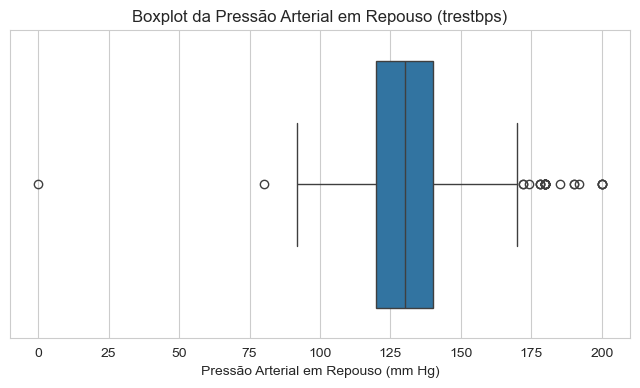

In [10]:
# Cria o boxplot da coluna 'trestbps'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["trestbps"])
plt.title("Boxplot da Pressão Arterial em Repouso (trestbps)")
plt.xlabel("Pressão Arterial em Repouso (mm Hg)")
plt.show()

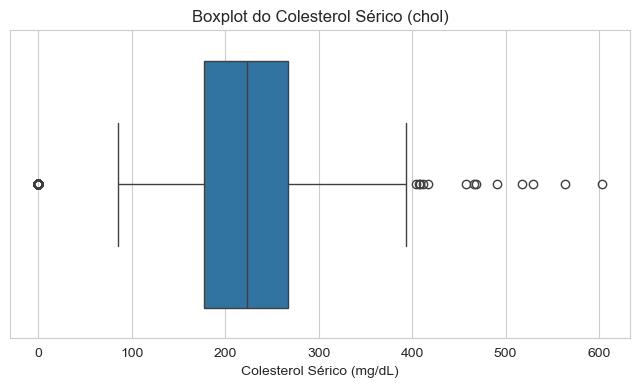

In [11]:
# Cria o boxplot da coluna 'chol'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["chol"])
plt.title("Boxplot do Colesterol Sérico (chol)")
plt.xlabel("Colesterol Sérico (mg/dL)")
plt.show()

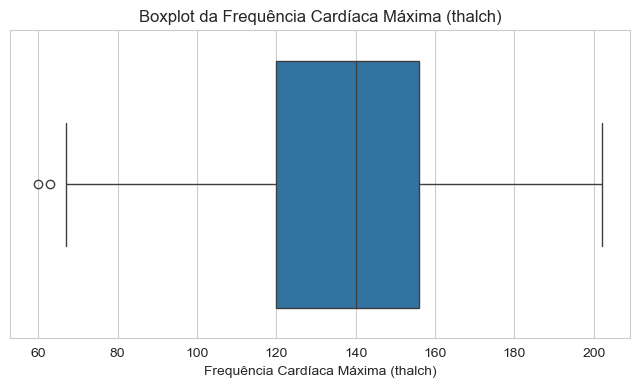

In [12]:
# Boxplot da coluna 'thalch'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["thalch"])
plt.title("Boxplot da Frequência Cardíaca Máxima (thalch)")
plt.xlabel("Frequência Cardíaca Máxima (thalch)")
plt.show()

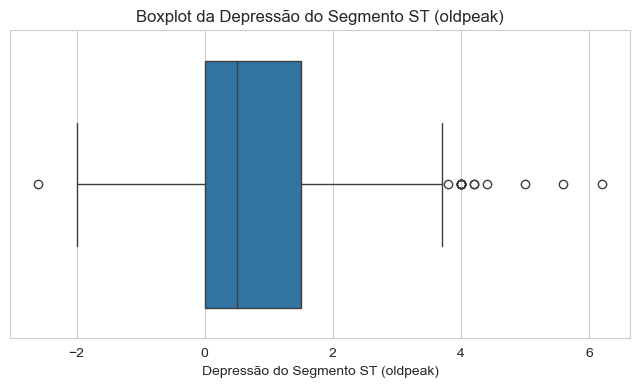

In [13]:
# Boxplot da coluna 'oldpeak'
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["oldpeak"])
plt.title("Boxplot da Depressão do Segmento ST (oldpeak)")
plt.xlabel("Depressão do Segmento ST (oldpeak)")
plt.show()

## **Análise e Recomendações**

**A regra geral é**: **nunca remova um outlier** a menos que você tenha certeza de que é um erro de medição ou de entrada de dados. 
Outliers podem ser os pontos mais importantes do seu dataset, especialmente em alguns contextos.

### **Coluna: trestbps (Pressão Arterial em Repouso)**
* **Outliers Altos (172 a 200)**: Esses valores são altos, mas são clinicamente plausíveis, especialmente para pacientes que estão sendo investigados por problemas cardíacos. Remover esses dados significaria ignorar os pacientes com hipertensão mais severa, o que poderia enfraquecer um modelo preditivo.
* **Outlier 0 e 80**: O valor 80 está abaixo do limite inferior de 90, mas é perfeitamente normal. O valor 0 é impossível para uma pessoa viva. Isso é claramente um erro de entrada ou um código para "dado ausente".

**Recomendação:**

* Manter os valores altos (172-200).
* Tratar o valor 0 como um dado ausente. Opções: remover a linha inteira ou, preferencialmente ou substituir o 0 pela média ou mediana da coluna trestbps.

### **Coluna: chol (Colesterol)**
* **Outliers Altos (404 a 603)**: Níveis de colesterol acima de 400 são muito altos, mas infelizmente possíveis, especialmente em casos de hipercolesterolemia familiar (uma condição genética). Assim como na pressão arterial, esses são provavelmente os casos mais graves e são dados valiosos.
* **Outliers 0**: Um nível de colesterol de 0 é clinicamente impossível. O fato de haver muitas ocorrências de 0 indica que este valor foi usado como um substituto para dados ausentes.

**Recomendação:**

* Manter os valores altos.
* Tratar todos os valores 0 como dados ausentes. Devido à grande quantidade (185 outliers, a maioria sendo zeros), remover todas essas linhas enfraqueceria muito seu dataset. A melhor abordagem é a imputação: substituir os zeros pela média ou mediana da coluna chol.

### **Coluna: thalch (Frequência Cardíaca Máxima)**
* **Outliers 60, 63**: O limite inferior calculado foi 66. Esses valores estão muito próximos do limite e são completamente plausíveis como frequência cardíaca máxima, talvez em pacientes mais velhos ou com condições específicas. 

**Recomendação:**

* Manter esses valores. Eles não são extremos e são clinicamente realistas.

### **Coluna: oldpeak (Depressão do Segmento ST)**
* **Outliers Altos (3.8 a 6.2)**: Um valor alto de oldpeak é um forte indicador de isquemia induzida por exercício e, portanto, um forte preditor de doença cardíaca. Estes são possivelmente os dados mais importantes da coluna.
* **Outlier -2.6**: Um oldpeak negativo é incomum (representa uma elevação do segmento ST em vez de depressão), mas pode ocorrer e ter significado clínico.

**Recomendação**:

* Manter todos esses valores. Eles representam informações clínicas cruciais sobre os casos mais severos ou atípicos. Removê-los prejudicaria gravemente a análise.

## **Tratamento de Outliers**

In [14]:
print("--- ANTES DO TRATAMENTO ---")
print("Valores '0' em 'trestbps':", (df['trestbps'] == 0).sum())
print("Valores '0' em 'chol':", (df['chol'] == 0).sum())
print("\nEstatísticas descritivas de 'trestbps':\n", df['trestbps'].describe())
print("\nEstatísticas descritivas de 'chol':\n", df['chol'].describe())

--- ANTES DO TRATAMENTO ---
Valores '0' em 'trestbps': 1
Valores '0' em 'chol': 172

Estatísticas descritivas de 'trestbps':
 count    920.000000
mean     131.995652
std       18.451300
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Estatísticas descritivas de 'chol':
 count    920.000000
mean     199.908696
std      109.040171
min        0.000000
25%      177.750000
50%      223.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64


In [15]:
# Substituir 0 por NaN (Not a Number) nas colunas 'trestbps' e 'chol'
df.loc[df['trestbps'] == 0, 'trestbps'] = np.nan
df.loc[df['chol'] == 0, 'chol'] = np.nan

In [16]:
# Calcular a mediana de cada coluna (ignorando os NaNs)
median_trestbps = df['trestbps'].median()
median_chol = df['chol'].median()
print(f"Mediana calculada para 'trestbps' (ignorando zeros): {median_trestbps}")
print(f"Mediana calculada para 'chol' (ignorando zeros): {median_chol}")

Mediana calculada para 'trestbps' (ignorando zeros): 130.0
Mediana calculada para 'chol' (ignorando zeros): 236.0


In [17]:
# Preencher os valores NaN com a mediana calculada
df['trestbps'] = df['trestbps'].fillna(median_trestbps)
df['chol'] = df['chol'].fillna(median_chol)

In [18]:
print("\n--- DEPOIS DO TRATAMENTO ---")
print("Valores '0' em 'trestbps':", (df['trestbps'] == 0).sum())
print("Valores '0' em 'chol':", (df['chol'] == 0).sum())
print("Valores nulos em 'trestbps':", df['trestbps'].isnull().sum())
print("Valores nulos em 'chol':", df['chol'].isnull().sum())
print("\nNovas estatísticas descritivas de 'trestbps':\n", df['trestbps'].describe())
print("\nNovas estatísticas descritivas de 'chol':\n", df['chol'].describe())


--- DEPOIS DO TRATAMENTO ---
Valores '0' em 'trestbps': 0
Valores '0' em 'chol': 0
Valores nulos em 'trestbps': 0
Valores nulos em 'chol': 0

Novas estatísticas descritivas de 'trestbps':
 count    920.000000
mean     132.136957
std       17.929761
min       80.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

Novas estatísticas descritivas de 'chol':
 count    920.000000
mean     244.030435
std       52.010955
min       85.000000
25%      217.750000
50%      236.000000
75%      267.000000
max      603.000000
Name: chol, dtype: float64


### **Salvar dataset tratado**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    bool   
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    bool   
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: bool(2), float64(4), int64(3), object(5)
memory usage: 88.2+ KB


In [20]:
# Inicializar df_final como uma cópia de df
df_final = df.copy()

In [21]:
# Definir o nome do arquivo de saída
nome_do_arquivo = 'heart_disease_uci_tratado_2.csv'

# Salvar o DataFrame em CSV, sem o índice e com codificação UTF-8
df_final.to_csv(nome_do_arquivo, index=False, encoding='utf-8')

# 3. Imprimir uma mensagem de confirmação
print(f"DataFrame foi salvo com sucesso no arquivo: '{nome_do_arquivo}'")

DataFrame foi salvo com sucesso no arquivo: 'heart_disease_uci_tratado_2.csv'


In [22]:
# Carregando a extensão watermark
%reload_ext watermark

In [23]:
# Imprimir
# -a (autor do projeto)
# -d (data)
# -t (hora)
# -v (versões do Python e do IPython)
# -m (informações sobre a máquina (hardware e sistema operacional))
#--iversions (versões de pacotes importadas (import))
%watermark -n -a "Patrick F. R. Ribeiro" -d -t -v -m --iversions

Author: Patrick F. R. Ribeiro

Python implementation: CPython
Python version       : 3.13.5
IPython version      : 8.30.0

Compiler    : MSC v.1929 64 bit (AMD64)
OS          : Windows
Release     : 11
Machine     : AMD64
Processor   : Intel64 Family 6 Model 140 Stepping 1, GenuineIntel
CPU cores   : 8
Architecture: 64bit

numpy     : 2.3.1
matplotlib: 3.10.0
pandas    : 2.2.3
seaborn   : 0.13.2

